<a href="https://colab.research.google.com/github/hemanth2000/sparsity-compression/blob/main/L1Norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robust regression using L1 norm

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

plt.rcParams['figure.figsize']=[7,7]
plt.rcParams.update({'font.size':18})

In [7]:
x = np.sort(4*np.random.rand(25,1)-0.5,axis=0)
b = 0.9*x+ 0.1*np.random.rand(len(x),1)
atrue = np.linalg.lstsq(x,b,rcond=None)[0]
atrue = atrue.item(0)

b[-1] = -5.5
aL2 = np.linalg.lstsq(x,b,rcond=None)[0]
aL2=aL2.item(0)

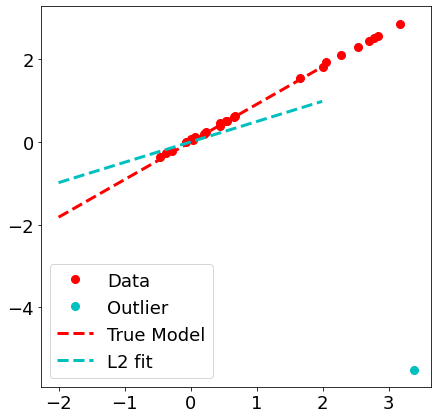

In [8]:
plt.plot(x[:-1],b[:-1],'o',color='r',ms=8,label='Data')
plt.plot(x[-1],b[-1],'o',color='c',ms=8,label='Outlier')

xgrid=np.arange(-2,2,0.01)
plt.plot(xgrid,atrue*xgrid,'--',linewidth=3,color='r',label='True Model')
plt.plot(xgrid,aL2*xgrid,'--',linewidth=3,color='c',label='L2 fit')
plt.legend()
plt.show()

In [9]:
def L1_norm(a):

  return np.linalg.norm(a*x-b,ord=1)

a0=aL2
res = minimize(L1_norm,a0)
aL1=res.x[0]

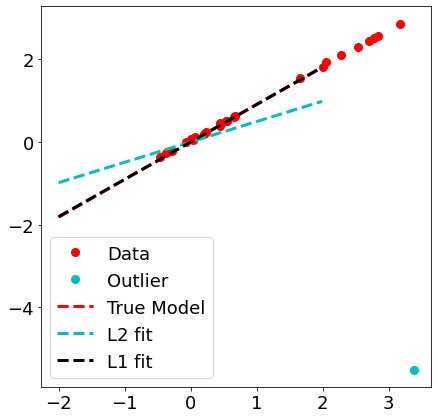

In [11]:
plt.plot(x[:-1],b[:-1],'o',color='r',ms=8,label='Data')
plt.plot(x[-1],b[-1],'o',color='c',ms=8,label='Outlier')

xgrid=np.arange(-2,2,0.01)
plt.plot(xgrid,atrue*xgrid,'--',linewidth=3,color='r',label='True Model')
plt.plot(xgrid,aL2*xgrid,'--',linewidth=3,color='c',label='L2 fit')
plt.plot(xgrid,aL1*xgrid,'--',linewidth=3,color='k',label='L1 fit')
plt.legend()
plt.show()

# Lasso Regression

Least Absolute Shrinkage and Selector Operator

The basic idea of optimization problem involves an objective function L. 

In Least squares, $L = ||Ax-b||_2$

In Ridge regression, $ L = || Ax-b||_2 + \alpha ||x||_2 $

In Lasso regression, $ L = || Ax-b||_2 + \lambda ||x||_1 $

In Elastic Net, $ L = || Ax-b||_2 + \lambda ||x||_1 + \alpha ||x||_2$

In scikit learn library, sklearn.linear_model.Lasso is the function.